In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m11 = pd.read_csv("meter1_phase1.csv")
m12 = pd.read_csv("meter1_phase2.csv")
m13 = pd.read_csv("meter1_phase3.csv")
m21 = pd.read_csv("meter2_phase1.csv")
m22 = pd.read_csv("meter2_phase2.csv")
m23 = pd.read_csv("meter2_phase3.csv")

In [3]:
m11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72446 entries, 0 to 72445
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                72446 non-null  object 
 1   energy_reactive          72446 non-null  float64
 2   current                  72446 non-null  float64
 3   power_reactive           72446 non-null  float64
 4   energy_reactive_to_grid  72446 non-null  float64
 5   voltage                  72446 non-null  float64
 6   energy                   72446 non-null  float64
 7   energy_to_grid           72446 non-null  int64  
 8   power                    72446 non-null  float64
 9   power_factor             72446 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 5.5+ MB


In [4]:
m12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3661 entries, 0 to 3660
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       3661 non-null   object 
 1   current         3661 non-null   float64
 2   power_reactive  3661 non-null   float64
 3   voltage         3661 non-null   float64
 4   power           3661 non-null   float64
 5   power_factor    3661 non-null   float64
dtypes: float64(5), object(1)
memory usage: 171.7+ KB


In [5]:
m13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68595 entries, 0 to 68594
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       68595 non-null  object 
 1   current         68595 non-null  float64
 2   power_reactive  68595 non-null  float64
 3   voltage         68595 non-null  float64
 4   power           68595 non-null  float64
 5   power_factor    68595 non-null  float64
dtypes: float64(5), object(1)
memory usage: 3.1+ MB


In [6]:
m11 = m11.iloc[:,[0,-2]]
m12 = m12.iloc[:,[0,-2]]
m13 = m13.iloc[:,[0,-2]]

In [7]:
m21 = m21.iloc[:,[0,-2]]
m22 = m22.iloc[:,[0,-2]]
m23 = m23.iloc[:,[0,-2]]

In [8]:
m1 = m11.merge(m12, on='timestamp', how='left')
m1 = m1.merge(m13, on='timestamp', how='left')
m1

,timestamp,power_x,power_y,power
0,2020-12-19 00:00:27,5.314347,1.379713,5.186693
1,2020-12-19 00:00:57,5.400183,1.672707,5.504138
2,2020-12-19 00:01:27,3.506593,1.718132,5.327560
3,2020-12-19 00:01:57,3.533533,1.711099,5.494409
4,2020-12-19 00:02:28,3.625191,1.701087,5.352803
...,...,...,...,...
125450,2021-01-13 17:36:20,0.789474,NaN,0.189797
125451,2021-01-13 17:36:50,0.853966,NaN,0.190722
125452,2021-01-13 17:37:20,0.853408,NaN,0.190490
125453,2021-01-13 17:37:50,0.859516,NaN,0.190330


In [9]:
m2 = m21.merge(m22, on='timestamp', how='left')
m2 = m2.merge(m23, on='timestamp', how='left')
m2

,timestamp,power_x,power_y,power
0,2020-12-19 00:00:28,8.864139,9.173263,8.733778
1,2020-12-19 00:00:58,8.771496,9.213596,8.632033
2,2020-12-19 00:01:28,8.787600,10.315261,7.006610
3,2020-12-19 00:01:58,8.780487,9.235799,8.369174
4,2020-12-19 00:02:28,8.861391,9.235237,8.341872
...,...,...,...,...
1164508,2021-01-13 17:54:51,2.993938,2.749172,NaN
1164509,2021-01-13 17:55:21,2.991434,2.733052,NaN
1164510,2021-01-13 17:55:51,2.990666,2.729736,NaN
1164511,2021-01-13 17:56:21,2.987323,2.738571,NaN


I assummed that some date with null value, I prefer to replace it by zero.

In [10]:
m1.fillna(0, inplace = True)
m2.fillna(0, inplace = True)

In [11]:
m1['timestamp'] = pd.to_datetime(m1['timestamp'])
m2['timestamp'] = pd.to_datetime(m2['timestamp'])

In [12]:
m1 = m1.resample('d', on='timestamp').mean().dropna(how='all')
m1.rename(columns={'power_x': 'M1power_A', 'power_y': 'M1power_B', 'power': 'M1power_C'}, inplace=True)

m2 = m2.resample('d', on='timestamp').mean().dropna(how='all')
m2.rename(columns={'power_x': 'M2power_A', 'power_y': 'M2power_B', 'power': 'M3power_C'}, inplace=True)

In [13]:
Ans = m1.merge(m2, on='timestamp', how='left')

### Calculate bill per day.
#### Assumed that 1 unit = 4 bath

In [14]:
Ans['Bil (Baht.-)'] =  Ans.sum(axis = 1) * 24
Ans

,M1power_A,M1power_B,M1power_C,M2power_A,M2power_B,M3power_C,Bil (Baht.-)
timestamp,,,,,,,
2020-12-19,4.235027,2.693744,3.935194,16.841757,12.184591,12.360701,1254.024337
2020-12-20,4.422915,0.451146,3.693927,16.237155,12.270998,11.961761,1176.909659
2020-12-21,4.251106,0.000000,3.469195,13.145427,10.816134,11.862818,1045.072341
2020-12-22,3.589367,0.000000,3.331582,12.365551,9.350430,10.234628,932.917393
2020-12-23,3.783025,0.000000,3.919612,10.448108,9.678062,9.233216,889.488552
2020-12-24,3.446856,0.000000,3.082699,12.096138,9.918808,9.620978,915.971497
2020-12-25,4.611626,0.000000,4.426376,12.831323,10.330466,9.207740,993.780733
2020-12-26,4.909207,0.000000,3.965304,13.966025,11.231687,10.486572,1069.411095
2020-12-27,6.208998,0.000000,5.128415,16.139221,12.717572,0.800355,983.869458


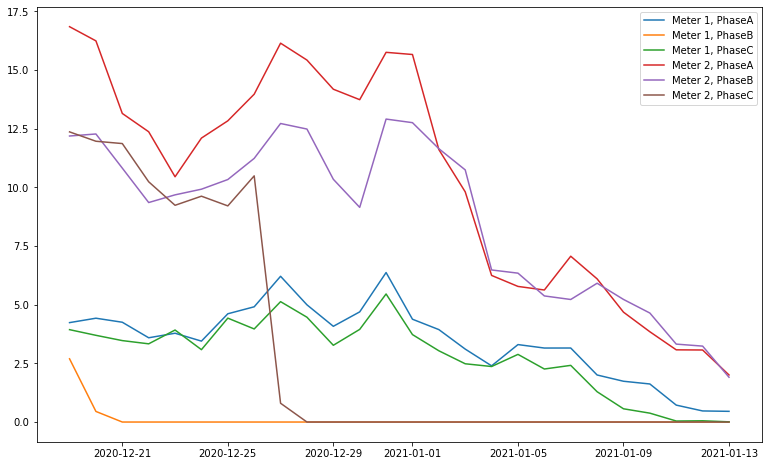

In [15]:
plt.figure(figsize=(13, 8))
plt.plot(Ans.iloc[:,0], label = 'Meter 1, PhaseA')
plt.plot(Ans.iloc[:,1], label = 'Meter 1, PhaseB')
plt.plot(Ans.iloc[:,2], label = 'Meter 1, PhaseC')
plt.plot(Ans.iloc[:,3], label = 'Meter 2, PhaseA')
plt.plot(Ans.iloc[:,4], label = 'Meter 2, PhaseB')
plt.plot(Ans.iloc[:,5], label = 'Meter 2, PhaseC')
plt.legend()

### Add data about weather

In [16]:
data = pd.read_csv("Weather.csv")
data["Date"] = pd.to_datetime(data['Date'])
data["timestamp"] = data["Date"].astype(str) + " " + data["Time"].astype(str)
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [17]:
data.drop(['Date', 'Time','Condition', 'Condition', 'Wind', "Direction", "Barometer", "Visibility"], axis = 1, inplace = True)

In [18]:
data['Temp'] = data['Temp'].map(lambda x: x.lstrip('+-').rstrip('aAbBcC%° ')).str.strip()
data['Humidity'] = data['Humidity'].map(lambda x: x.lstrip('+-').rstrip('aAbBcC%')).str.strip()

In [19]:
data.head()

,Temp,Humidity,timestamp
0,23,79,2020-12-19 01:00:00
1,21,83,2020-12-19 04:00:00
2,21,84,2020-12-19 07:00:00
3,23,72,2020-12-19 10:00:00
4,28,54,2020-12-19 13:00:00


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Temp       207 non-null    object        
 1   Humidity   207 non-null    object        
 2   timestamp  207 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 5.0+ KB


In [21]:
data['Temp'] = pd.to_numeric(data.iloc[:,0])
data['Humidity'] = pd.to_numeric(data.iloc[:,1])

In [22]:
data = data.resample('d', on='timestamp').mean().dropna(how='all')

In [23]:
data

,Temp,Humidity
timestamp,,
2020-12-19,24.375000,70.250000
2020-12-20,22.375000,73.500000
2020-12-21,21.875000,55.875000
2020-12-22,19.750000,61.375000
2020-12-23,19.375000,68.625000
2020-12-24,20.250000,67.125000
2020-12-25,21.250000,68.750000
2020-12-26,24.125000,68.500000
2020-12-27,25.125000,71.125000


In [24]:
Ans = Ans.merge(data, on='timestamp', how='left')

In [25]:
Ans.head()

,M1power_A,M1power_B,M1power_C,M2power_A,M2power_B,M3power_C,Bil (Baht.-),Temp,Humidity
timestamp,,,,,,,,,
2020-12-19,4.235027,2.693744,3.935194,16.841757,12.184591,12.360701,1254.024337,24.375,70.250
2020-12-20,4.422915,0.451146,3.693927,16.237155,12.270998,11.961761,1176.909659,22.375,73.500
2020-12-21,4.251106,0.000000,3.469195,13.145427,10.816134,11.862818,1045.072341,21.875,55.875
2020-12-22,3.589367,0.000000,3.331582,12.365551,9.350430,10.234628,932.917393,19.750,61.375
2020-12-23,3.783025,0.000000,3.919612,10.448108,9.678062,9.233216,889.488552,19.375,68.625


In [29]:
Ans.to_csv('Outcome.csv', index = True)